# Preparación del modelo

## Importación de librerías

In [2]:
import glob, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
import seaborn as sns

# Carga de datos

## Geodataframe

In [3]:
agebs = gpd.read_file('data/colima/agebs.gpkg')
agebs["area"] = agebs.area / 1000 # ha
agebs.drop(columns=["CVE_ENT","CVE_MUN", "CVE_AGEB","CVE_LOC","geometry"], inplace=True)
agebs = pd.DataFrame(agebs)

## Zonal Statistics

In [4]:
df0 = pd.read_csv('data/megaGDF.csv')
df0.drop(columns=["CVE_ENT","CVE_MUN","CVE_LOC", "_count","_sum"], inplace=True)
df0.head()

,CVEGEO,CVE_AGEB,_mean,class,time
0,0600200010676,0676,NaN,Depth,0
1,0600200010727,0727,NaN,Depth,0
2,0600200011142,1142,NaN,Depth,0
3,0600200010411,0411,NaN,Depth,0
4,0600200011068,1068,NaN,Depth,0


In [5]:
df = df0.pivot_table(index=["CVEGEO",'CVE_AGEB',"time"], columns='class', values=["_mean"])
df.reset_index(inplace=True)
# remove double header
df.columns = df.columns.droplevel(0)
df.columns = ['CVEGEO', 'CVE_AGEB',"time", 'Depth', 'Rain', 'Velocity']
df

,CVEGEO,CVE_AGEB,time,Depth,Rain,Velocity
0,0600200010318,0318,0,NaN,0.00,NaN
1,0600200010318,0318,300,NaN,0.00,NaN
2,0600200010318,0318,600,NaN,0.72,NaN
3,0600200010318,0318,900,NaN,0.72,NaN
4,0600200010318,0318,1200,NaN,1.38,NaN
...,...,...,...,...,...,...
2123,0601000010362,0362,23100,0.016889,4.80,0.070683
2124,0601000010362,0362,23400,0.016851,8.76,0.070517
2125,0601000010362,0362,23700,0.016796,8.76,0.070501
2126,0601000010362,0362,24000,0.016748,7.80,0.070419


In [6]:
df = df.merge(agebs, on="CVEGEO")
df

,CVEGEO,CVE_AGEB,time,Depth,Rain,Velocity,area
0,0600200010318,0318,0,NaN,0.00,NaN,339.556144
1,0600200010318,0318,300,NaN,0.00,NaN,339.556144
2,0600200010318,0318,600,NaN,0.72,NaN,339.556144
3,0600200010318,0318,900,NaN,0.72,NaN,339.556144
4,0600200010318,0318,1200,NaN,1.38,NaN,339.556144
...,...,...,...,...,...,...,...
2123,0601000010362,0362,23100,0.016889,4.80,0.070683,227.156848
2124,0601000010362,0362,23400,0.016851,8.76,0.070517,227.156848
2125,0601000010362,0362,23700,0.016796,8.76,0.070501,227.156848
2126,0601000010362,0362,24000,0.016748,7.80,0.070419,227.156848


## Denue and INV

In [7]:
denue_inv = pd.read_csv('data/denue_inv.csv')
denue_inv.head()

,CVE_AGEB,POBTOT,POB0_14_P,P15A29A_P,P30A59A_P,GRAPROES,P_CD_P,VPH_C_EL_P,VPH_EXSA_P,VPH_DREN_P,...,PARATRAN_C,DRENAJEP_C,TRANSCOL_C,ARBOLES_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C,escuela,farmacia,hospital
0,0273,74,6.349231,7.081538,13.980769,3.403077,3.540769,30.769231,29.486923,400.00,...,39,39,38,31,39,39,39,1.0,0.0,0.0
1,0318,1925,11.397551,17.568980,31.385102,10.333878,7.330000,85.303878,85.473878,4188.22,...,143,128,115,81,144,146,143,13.0,6.0,0.0
2,0322,2143,11.647736,17.747170,30.118113,11.442453,7.085472,88.486038,88.553396,4693.33,...,155,150,144,70,159,155,151,13.0,3.0,3.0
3,0362,2342,18.422286,21.292000,33.820000,9.617714,5.100857,91.145714,91.380857,3198.33,...,103,102,97,45,105,102,102,4.0,1.0,1.0
4,0411,1116,9.866053,17.035000,33.167105,11.912895,4.348947,81.578947,81.578947,3100.00,...,113,112,109,66,47,113,111,12.0,2.0,0.0


## Join

In [8]:
df_full = df.merge(denue_inv, on="CVE_AGEB")
df_full

,CVEGEO,CVE_AGEB,time,Depth,Rain,Velocity,area,POBTOT,POB0_14_P,P15A29A_P,...,PARATRAN_C,DRENAJEP_C,TRANSCOL_C,ARBOLES_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C,escuela,farmacia,hospital
0,0600200010318,0318,0,NaN,0.00,NaN,339.556144,1925,11.397551,17.56898,...,143,128,115,81,144,146,143,13.0,6.0,0.0
1,0600200010318,0318,300,NaN,0.00,NaN,339.556144,1925,11.397551,17.56898,...,143,128,115,81,144,146,143,13.0,6.0,0.0
2,0600200010318,0318,600,NaN,0.72,NaN,339.556144,1925,11.397551,17.56898,...,143,128,115,81,144,146,143,13.0,6.0,0.0
3,0600200010318,0318,900,NaN,0.72,NaN,339.556144,1925,11.397551,17.56898,...,143,128,115,81,144,146,143,13.0,6.0,0.0
4,0600200010318,0318,1200,NaN,1.38,NaN,339.556144,1925,11.397551,17.56898,...,143,128,115,81,144,146,143,13.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,0601000010362,0362,23100,0.016889,4.80,0.070683,227.156848,2342,18.422286,21.29200,...,103,102,97,45,105,102,102,4.0,1.0,1.0
2124,0601000010362,0362,23400,0.016851,8.76,0.070517,227.156848,2342,18.422286,21.29200,...,103,102,97,45,105,102,102,4.0,1.0,1.0
2125,0601000010362,0362,23700,0.016796,8.76,0.070501,227.156848,2342,18.422286,21.29200,...,103,102,97,45,105,102,102,4.0,1.0,1.0
2126,0601000010362,0362,24000,0.016748,7.80,0.070419,227.156848,2342,18.422286,21.29200,...,103,102,97,45,105,102,102,4.0,1.0,1.0


In [118]:
list_area = ["POBTOT",'RECUCALL_C', 'RAMPAS_C', 'PASOPEAT_C',
       'BANQUETA_C', 'CICLOVIA_C', 'CICLOCAR_C', 'ALUMPUB_C', 'SEMAAUDI_C',
       'PARATRAN_C', 'DRENAJEP_C', 'TRANSCOL_C', 'ARBOLES_C', 'ACESOAUT_C',
       'PUESSEMI_C', 'PUESAMBU_C', 'escuela', 'farmacia', 'hospital']

for i in list_area:
    df_full[i] = df_full[i] / df_full["area"]

In [9]:
df_full.head(2).to_csv('data/example.csv')

In [119]:
df_full.columns

Index(['CVEGEO', 'CVE_AGEB', 'time', 'Depth', 'Rain', 'Velocity', 'area',
       'POBTOT', 'POB0_14_P', 'P15A29A_P', 'P30A59A_P', 'GRAPROES', 'P_CD_P',
       'VPH_C_EL_P', 'VPH_EXSA_P', 'VPH_DREN_P', 'RECUCALL_C', 'RAMPAS_C',
       'PASOPEAT_C', 'BANQUETA_C', 'CICLOVIA_C', 'CICLOCAR_C', 'ALUMPUB_C',
       'SEMAAUDI_C', 'PARATRAN_C', 'DRENAJEP_C', 'TRANSCOL_C', 'ARBOLES_C',
       'ACESOAUT_C', 'PUESSEMI_C', 'PUESAMBU_C', 'escuela', 'farmacia',
       'hospital'],
      dtype='object')

In [120]:
df_full.replace([np.nan], 0, inplace=True)

df_full.dropna(subset="Depth",inplace=True)
df_full.drop(columns=["CVEGEO","area"], inplace=True)

In [84]:
# Calcular la cantidad de agua acumulada por área durante la tormenta
df_full["acum_agua"] = df_full["Depth"] * df_full["area"]

# Calcular el índice de riesgo basado en la cantidad de agua acumulada y la densidad poblacional
df_full["riesgo"] = np.where(df_full["POBTOT"] == 0, 0, df_full["acum_agua"] / df_full["POBTOT"])

In [121]:
df_full.describe()

,time,Depth,Rain,Velocity,POBTOT,POB0_14_P,P15A29A_P,P30A59A_P,GRAPROES,P_CD_P,...,PARATRAN_C,DRENAJEP_C,TRANSCOL_C,ARBOLES_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C,escuela,farmacia,hospital
count,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,...,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000
mean,12127.161654,0.187875,5.140376,0.527384,4.907563,13.715332,18.723482,33.262518,10.481927,5.761340,...,0.294701,0.280747,0.268686,0.155014,0.283031,0.295730,0.291821,0.020800,0.007161,0.002585
std,7089.632672,0.230293,7.006402,0.630019,2.463613,4.298687,2.715630,3.538077,1.518658,2.720430,...,0.098596,0.101653,0.096795,0.049552,0.110762,0.095936,0.096671,0.014787,0.007274,0.003263
min,0.000000,0.000000,0.000000,0.000000,0.763735,5.978372,13.757209,26.724800,7.758302,1.448605,...,0.155521,0.151374,0.140659,0.081039,0.072710,0.155521,0.155521,0.004147,0.000000,0.000000
25%,6000.000000,0.000000,1.140000,0.000000,2.961125,10.981154,17.035000,30.118113,9.569600,2.937368,...,0.221345,0.197157,0.187864,0.109205,0.208822,0.226925,0.221345,0.008389,0.003668,0.000000
50%,12000.000000,0.094626,2.220000,0.265657,4.742263,12.719286,19.053636,33.346176,10.210981,5.850000,...,0.260760,0.251447,0.235150,0.155901,0.257202,0.266590,0.258606,0.015385,0.005178,0.002142
75%,18300.000000,0.281485,7.200000,0.912471,5.942048,15.677234,20.527500,35.534118,11.442453,7.507209,...,0.376356,0.376356,0.351083,0.190500,0.376356,0.376356,0.373989,0.031621,0.008164,0.004402
max,24300.000000,1.005461,36.300000,2.407312,10.310057,25.316415,25.398293,40.178511,13.536364,10.405106,...,0.486407,0.481543,0.452359,0.248068,0.496135,0.457223,0.476679,0.059733,0.032164,0.012701


# Modelo

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [18]:
df_nonull = df_full.dropna()
df_nonull

,CVEGEO,CVE_AGEB,time,Depth,Rain,Velocity,area,POBTOT,POB0_14_P,P15A29A_P,...,PARATRAN_C,DRENAJEP_C,TRANSCOL_C,ARBOLES_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C,escuela,farmacia,hospital
16,0600200010318,0318,4800,0.184496,2.28,1.304236,339.556144,1925,11.397551,17.56898,...,143,128,115,81,144,146,143,13.0,6.0,0.0
17,0600200010318,0318,5100,0.245083,2.28,1.110827,339.556144,1925,11.397551,17.56898,...,143,128,115,81,144,146,143,13.0,6.0,0.0
18,0600200010318,0318,5400,0.243836,1.14,1.061582,339.556144,1925,11.397551,17.56898,...,143,128,115,81,144,146,143,13.0,6.0,0.0
19,0600200010318,0318,5700,0.238523,1.14,1.057759,339.556144,1925,11.397551,17.56898,...,143,128,115,81,144,146,143,13.0,6.0,0.0
20,0600200010318,0318,6000,0.239998,0.48,1.066644,339.556144,1925,11.397551,17.56898,...,143,128,115,81,144,146,143,13.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,0601000010362,0362,22800,0.016918,4.80,0.070813,227.156848,2342,18.422286,21.29200,...,103,102,97,45,105,102,102,4.0,1.0,1.0
2123,0601000010362,0362,23100,0.016889,4.80,0.070683,227.156848,2342,18.422286,21.29200,...,103,102,97,45,105,102,102,4.0,1.0,1.0
2124,0601000010362,0362,23400,0.016851,8.76,0.070517,227.156848,2342,18.422286,21.29200,...,103,102,97,45,105,102,102,4.0,1.0,1.0
2125,0601000010362,0362,23700,0.016796,8.76,0.070501,227.156848,2342,18.422286,21.29200,...,103,102,97,45,105,102,102,4.0,1.0,1.0


In [19]:
data = df_nonull[[
  'CVE_AGEB', 'time', 'Depth', 'Rain', 'Velocity', 'area', 
  'POBTOT', 'GRAPROES', 'P_CD_P', 'VPH_C_EL_P', 
  'VPH_EXSA_P', 'RECUCALL_C', 'RAMPAS_C', 'PASOPEAT_C', 
  'BANQUETA_C', 'CICLOVIA_C', 'CICLOCAR_C', 'ALUMPUB_C', 
  'SEMAAUDI_C', 'PARATRAN_C', 'DRENAJEP_C', 'TRANSCOL_C', 
  'ARBOLES_C', 'ACESOAUT_C', 'PUESSEMI_C', 'PUESAMBU_C', 
  'escuela', 'farmacia', 'hospital']]

# Convertir la columna CVE_AGEB en variables dummy
data = pd.concat([data, pd.get_dummies(data['CVE_AGEB'], prefix='CVE_AGEB')], axis=1)
data = data.drop('CVE_AGEB', axis=1)

In [20]:
# Convertir la columna time en variables dummy
data = pd.concat([data, pd.get_dummies(data['time'], prefix='time')], axis=1)
data = data.drop('time', axis=1)

In [21]:
# Calcular la cantidad de agua acumulada por área durante la tormenta
data["acum_agua"] = data["Depth"] * data["area"]

# Calcular el índice de riesgo basado en la cantidad de agua acumulada y la densidad poblacional
data["riesgo"] = np.where(data["POBTOT"] == 0, 0, data["acum_agua"] / data["POBTOT"])

In [22]:
# Separar las variables independientes y dependientes
X = data.drop('riesgo', axis=1)
y = data['riesgo']

In [23]:
y

16      0.032544
17      0.043231
18      0.043011
19      0.042074
20      0.042334
          ...   
2122    0.001641
2123    0.001638
2124    0.001634
2125    0.001629
2126    0.001624
Name: riesgo, Length: 1465, dtype: float64

In [24]:
# Convertir la variable dependiente en variables dummy
y = to_categorical(y)

In [25]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=42)


In [26]:
# Crear un modelo secuencial
model = Sequential()

# Añadir capas densas con funciones de activación ReLU y dropout para evitar el sobreajuste
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))

# Añadir una capa densa final con función de activación Softmax para la clasificación
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilar el modelo con la función de pérdida de entropía cruzada y el optimizador Adam
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [29]:
# Entrenar el modelo con los datos de entrenamiento
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/50
37/37 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/50
37/37 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/50
37/37 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss

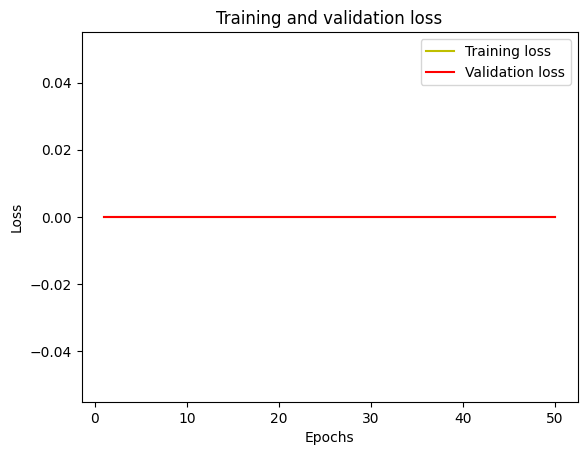

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("training_validation.png", dpi = 300)
plt.show()

## Machine learning model

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# cargamos los datos
df = df_full.dropna()

# creamos una variable que contenga las columnas relevantes
features = ['CVE_AGEB', 'time', 'Depth', 'Rain', 'Velocity', 'area', 'POBTOT', 'POB0_14_P', 'P15A29A_P', 'P30A59A_P', 'GRAPROES', 'P_CD_P', 'VPH_C_EL_P', 'VPH_EXSA_P', 'VPH_DREN_P', 'RECUCALL_C', 'RAMPAS_C', 'PASOPEAT_C', 'BANQUETA_C', 'CICLOVIA_C', 'CICLOCAR_C', 'ALUMPUB_C', 'SEMAAUDI_C', 'PARATRAN_C', 'DRENAJEP_C', 'TRANSCOL_C', 'ARBOLES_C', 'ACESOAUT_C', 'PUESSEMI_C', 'PUESAMBU_C', 'escuela', 'farmacia', 'hospital']

# Calcular la cantidad de agua acumulada por área durante la tormenta
df["acum_agua"] = df["Depth"] * df["area"]

# Calcular el índice de riesgo basado en la cantidad de agua acumulada y la densidad poblacional
df["riesgo"] = np.where(df["POBTOT"] == 0, 0, df["acum_agua"] / df["POBTOT"])

# dividimos los datos en conjunto de entrenamiento y conjunto de prueba
train_df, test_df = train_test_split(df[features + ['riesgo']], test_size=0.2, random_state=42)

# creamos el modelo de Machine Learning
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# entrenamos el modelo con los datos de entrenamiento
rf.fit(train_df[features], train_df['riesgo'])

# hacemos predicciones con el conjunto de prueba
predictions = rf.predict(test_df[features])

# evaluamos el modelo
accuracy = accuracy_score(test_df['riesgo'], predictions)
print('Accuracy:', accuracy)

In [71]:
df_full

,CVEGEO,CVE_AGEB,time,Depth,Rain,Velocity,area,POBTOT,POB0_14_P,P15A29A_P,...,PARATRAN_C,DRENAJEP_C,TRANSCOL_C,ARBOLES_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C,escuela,farmacia,hospital
0,0600200010318,0318,0,NaN,0.00,NaN,339.556144,1925,11.397551,17.56898,...,143,128,115,81,144,146,143,13.0,6.0,0.0
1,0600200010318,0318,300,NaN,0.00,NaN,339.556144,1925,11.397551,17.56898,...,143,128,115,81,144,146,143,13.0,6.0,0.0
2,0600200010318,0318,600,NaN,0.72,NaN,339.556144,1925,11.397551,17.56898,...,143,128,115,81,144,146,143,13.0,6.0,0.0
3,0600200010318,0318,900,NaN,0.72,NaN,339.556144,1925,11.397551,17.56898,...,143,128,115,81,144,146,143,13.0,6.0,0.0
4,0600200010318,0318,1200,NaN,1.38,NaN,339.556144,1925,11.397551,17.56898,...,143,128,115,81,144,146,143,13.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,0601000010362,0362,23100,0.016889,4.80,0.070683,227.156848,2342,18.422286,21.29200,...,103,102,97,45,105,102,102,4.0,1.0,1.0
2124,0601000010362,0362,23400,0.016851,8.76,0.070517,227.156848,2342,18.422286,21.29200,...,103,102,97,45,105,102,102,4.0,1.0,1.0
2125,0601000010362,0362,23700,0.016796,8.76,0.070501,227.156848,2342,18.422286,21.29200,...,103,102,97,45,105,102,102,4.0,1.0,1.0
2126,0601000010362,0362,24000,0.016748,7.80,0.070419,227.156848,2342,18.422286,21.29200,...,103,102,97,45,105,102,102,4.0,1.0,1.0


In [77]:
df_full.dtypes

CVEGEO         object
CVE_AGEB       object
time            int64
Depth         float64
Rain          float64
Velocity      float64
area          float64
POBTOT          int64
POB0_14_P     float64
P15A29A_P     float64
P30A59A_P     float64
GRAPROES      float64
P_CD_P        float64
VPH_C_EL_P    float64
VPH_EXSA_P    float64
VPH_DREN_P    float64
RECUCALL_C      int64
RAMPAS_C        int64
PASOPEAT_C      int64
BANQUETA_C      int64
CICLOVIA_C      int64
CICLOCAR_C      int64
ALUMPUB_C       int64
SEMAAUDI_C      int64
PARATRAN_C      int64
DRENAJEP_C      int64
TRANSCOL_C      int64
ARBOLES_C       int64
ACESOAUT_C      int64
PUESSEMI_C      int64
PUESAMBU_C      int64
escuela       float64
farmacia      float64
hospital      float64
dtype: object

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# Leer el archivo CSV
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Leer los datos desde un archivo csv
datos = df_full.dropna()

# Eliminar las variables claves o identificadores
datos = datos.drop(['CVEGEO', 'CVE_AGEB'], axis=1)

# Transformar las variables categóricas usando codificación one-hot
datos = pd.get_dummies(datos)

# Normalizar los datos usando normalización min-max
scaler = MinMaxScaler()
datos_norm = scaler.fit_transform(datos)




In [79]:
# Aplicar el método del codo para encontrar el valor óptimo de k
sse = [] # lista vacía para guardar los valores de SSE
k_range = range(1,11) # rango de valores posibles de k (de 1 a 10)
for k in k_range:
    modelo = KMeans(n_clusters=k) # inicializar el modelo con k clusters
    modelo.fit(datos_norm) # ajustar el modelo a los datos normalizados
    sse.append(modelo.inertia_) # agregar el valor de SSE a la lista




c:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

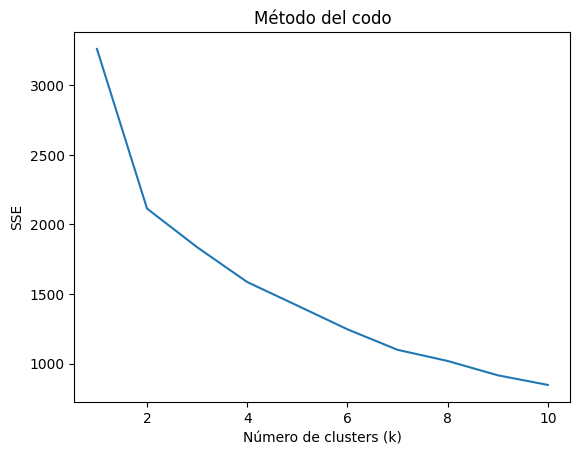

c:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [80]:
# Graficar los valores de SSE en función de k
plt.plot(k_range,sse)
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE')
plt.title('Método del codo')
plt.show()

# Elegir el valor óptimo de k según el gráfico (en este caso supongamos que es 4)
k_optimo = 4

# Inicializar y ajustar el modelo con k_optimo clusters
modelo_optimo = KMeans(n_clusters=k_optimo)
etiquetas_optimas = modelo_optimo.fit_predict(datos_norm)

# Recuperar los centroides óptimos 
centroides_optimos = modelo_optimo.cluster_centers_

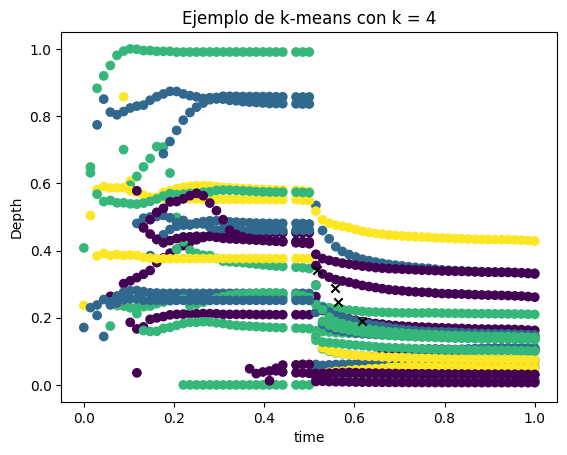

In [81]:
# Graficar los datos con los clusters y los centroides (solo se pueden graficar dos variables a la vez)
plt.scatter(datos_norm[:,0], datos_norm[:,1], c=etiquetas_optimas) # graficar las dos primeras variables con colores según su cluster 
plt.scatter(centroides_optimos[:,0], centroides_optimos[:,1], c='black', marker='x') # graficar los centroides con color negro y forma de x 
plt.xlabel('time') # poner etiqueta al eje x 
plt.ylabel('Depth') # poner etiqueta al eje y 
plt.title('Ejemplo de k-means con k = 4') # poner título al gráfico
plt.show()

In [88]:
df_full

,CVEGEO,CVE_AGEB,time,Depth,Rain,Velocity,area,POBTOT,POB0_14_P,P15A29A_P,...,TRANSCOL_C,ARBOLES_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C,escuela,farmacia,hospital,acum_agua,riesgo
16,0600200010318,0318,4800,0.184496,2.28,1.304236,339.556144,1925,11.397551,17.56898,...,115,81,144,146,143,13.0,6.0,0.0,62.646839,0.032544
17,0600200010318,0318,5100,0.245083,2.28,1.110827,339.556144,1925,11.397551,17.56898,...,115,81,144,146,143,13.0,6.0,0.0,83.219496,0.043231
18,0600200010318,0318,5400,0.243836,1.14,1.061582,339.556144,1925,11.397551,17.56898,...,115,81,144,146,143,13.0,6.0,0.0,82.795898,0.043011
19,0600200010318,0318,5700,0.238523,1.14,1.057759,339.556144,1925,11.397551,17.56898,...,115,81,144,146,143,13.0,6.0,0.0,80.992110,0.042074
20,0600200010318,0318,6000,0.239998,0.48,1.066644,339.556144,1925,11.397551,17.56898,...,115,81,144,146,143,13.0,6.0,0.0,81.492909,0.042334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,0601000010362,0362,22800,0.016918,4.80,0.070813,227.156848,2342,18.422286,21.29200,...,97,45,105,102,102,4.0,1.0,1.0,3.843096,0.001641
2123,0601000010362,0362,23100,0.016889,4.80,0.070683,227.156848,2342,18.422286,21.29200,...,97,45,105,102,102,4.0,1.0,1.0,3.836370,0.001638
2124,0601000010362,0362,23400,0.016851,8.76,0.070517,227.156848,2342,18.422286,21.29200,...,97,45,105,102,102,4.0,1.0,1.0,3.827932,0.001634
2125,0601000010362,0362,23700,0.016796,8.76,0.070501,227.156848,2342,18.422286,21.29200,...,97,45,105,102,102,4.0,1.0,1.0,3.815218,0.001629


In [86]:
df_full = df_full.dropna()

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X = datos_norm # variables independientes (características de las AGEBs)
y = df_full['riesgo'] # variable dependiente (nivel de riesgo ante inundaciones)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crear una instancia del modelo de regresión logística
modelo = LogisticRegression()

# Ajustar el modelo a los datos de entrenamiento
modelo.fit(X_train, y_train)

# Predecir el nivel de riesgo en los datos de prueba
y_pred = modelo.predict(X_test)

# Calcular la precisión del modelo en los datos de prueba
precision = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {precision}')

ValueError: Unknown label type: 'continuous'